In [45]:
from mendeleev import element
import pandas as pd
import numpy as np
import pymatgen as mg
import seaborn as sns
from pymatgen.ext.matproj import MPRester
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [ ]:
# can use with Bilayer 1/3 and Monolayer 1 

In [3]:
df_bilayer_all_data = pd.read_csv("BiLayer_Data.csv") 
df_monolayer_all_data = pd.read_csv("MonoLayer_Data.csv") 

In [46]:
def create_dict_of_elements_and_formation_energy_with_both_so(df):
    # form a dictionary as key = Formula and value = [type_with_lowest_formation_energy, lowest_formation_energy , hasInitial, hasFMso, has AFMso]
    rownum = len(df)
    dict_of_element_and_lowest_formation_energy_without_initial= {}
    dict_of_element_and_lowest_formation_energy_with_both_so = {}
    
    for i in range(rownum) :
        Formula = df.iloc[i]['Formula']
        name = df.iloc[i]['name']
        formation_energy = df.iloc[i]['formation_energy']
        
        magmom_total = df.iloc[i]['magmom_total']
        
        #print(Formula + " " + name + " " + str(formation_energy))
        
        if name == 'afm_so':
            isafm_so = True
        else :
            isafm_so = False
            
        if name == 'spin_so':
            isfm_so = True
        else :
            isfm_so = False
            
        if name == 'initial':
            isinitial = True
        else :
            isinitial = False
 
        list_energy_type = []
        if isfm_so or isafm_so :
            if Formula in dict_of_element_and_lowest_formation_energy_without_initial.keys():
                list_energy_type = dict_of_element_and_lowest_formation_energy_without_initial.get(Formula)
                # check if the previous formation energy is greater than the current one, if yes replace
                prev_formation_energy = list_energy_type[1]

                if(prev_formation_energy > formation_energy):

                    list_energy_type[0] = name
                    list_energy_type[1] = formation_energy 
                    list_energy_type[5] = magmom_total
                    # update the dictionary with new value 
                    dict_of_element_and_lowest_formation_energy_without_initial[Formula] = list_energy_type
            else :
                # insert new entry in dictionary
                 # list contains type, formation_energy , hasInitial, hasFMso, has AFMso
                list_energy_type = [name, formation_energy, False, False, False,magmom_total]
                dict_of_element_and_lowest_formation_energy_without_initial.update({Formula: list_energy_type})


            if isinitial :
                list_energy_type[2] = True

            elif isfm_so :
                list_energy_type[3] = True

            elif isafm_so :
                list_energy_type[4] = True

            list_energy_type[5] = magmom_total
            dict_of_element_and_lowest_formation_energy_without_initial[Formula] = list_energy_type
         
        #formation_energy.append(formation_energy_val)       
    
    #df['formation_energy'] = formation_energy
    #print(dict_of_element_and_lowest_formation_energy_without_initial)
    
    #return dict_of_element_and_lowest_formation_energy_without_initial
    
    # take only the data that has both afm_so and spin_so
    
    for key in dict_of_element_and_lowest_formation_energy_without_initial:
        
        list_val = dict_of_element_and_lowest_formation_energy_without_initial[key]
        #isfm_so : list_energy_type[3] = True
        #isafm_so :list_energy_type[4] = True
                
        if(list_val[3] and list_val[4]):
            dict_of_element_and_lowest_formation_energy_with_both_so[key] = list_val
            

    return dict_of_element_and_lowest_formation_energy_with_both_so

In [47]:
dict_of_element_and_lowest_formation_energy_with_both_so_bilayer ={}
dict_of_element_and_lowest_formation_energy_with_both_so_monolayer ={}

dict_of_element_and_lowest_formation_energy_with_both_so_bilayer = create_dict_of_elements_and_formation_energy_with_both_so(df_bilayer_all_data)
dict_of_element_and_lowest_formation_energy_with_both_so_monolayer = create_dict_of_elements_and_formation_energy_with_both_so(df_monolayer_all_data)


#dict_of_element_and_lowest_formation_energy_with_both_so = create_dict_of_elements_and_formation_energy_with_both_so(df_filtered_finished_data)
print("Count of structure with both afm_so and spin_so : ")
print("Bilayer :")
print(len(dict_of_element_and_lowest_formation_energy_with_both_so_bilayer))

print("Monolayer : ")
print(len(dict_of_element_and_lowest_formation_energy_with_both_so_monolayer))


Count of structure with both afm_so and spin_so : 
Bilayer :
26
Monolayer : 
200


In [6]:
present_in_both = 0
present_in_both_list = []
present_in_only_bilayer_list = []

for key in dict_of_element_and_lowest_formation_energy_with_both_so_bilayer:
    if key in dict_of_element_and_lowest_formation_energy_with_both_so_monolayer:
        present_in_both_list.append(key)
        present_in_both = present_in_both + 1  
    else:
        present_in_only_bilayer_list.append(key)
print("structure present in both : " + str(present_in_both))
print("Structures present in both : ")
print(present_in_both_list)
print("Structures present only in bilayer : ")
print(present_in_only_bilayer_list)

structure present in both : 20
Structures present in both : 
['Mo2Ir2Br12', 'Ti2Ni2Br12', 'Ti2Ru2Cl12', 'Ti2Ni2Cl12', 'Ir2Pd2Cl12', 'Ir4Br12', 'Ti2Cd2Cl12', 'Cr2Ir2Br12', 'Fe2Ir2Cl12', 'Ti2Cd2Br12', 'Ir4Cl12', 'Mo2Ir2Cl12', 'Ti2Zn2Br12', 'Zn2Ir2Cl12', 'Ti4Cl12', 'Ir2Au2Cl12', 'Zr2Ir2Cl12', 'Fe2Ir2Br12', 'Cd2Ir2Cl12', 'Ir2Ru2I12']
Structures present only in bilayer : 
['Cd2Ir2Br12', 'Ti2Pd2Cl12', 'Cd2Ir2I12', 'Ti2Zn2Cl12', 'Ti4Br12', 'Cr2Ir2Cl12']


In [7]:
colNames = ["name", "Formation Energy", "has Initial", "has fm_so", "has afm_so", "magmom_total"]

bilayer_lowest_formation_energy_temp = pd.DataFrame.from_dict(dict_of_element_and_lowest_formation_energy_with_both_so_bilayer, orient='index',columns=colNames)
bilayer_lowest_formation_energy = bilayer_lowest_formation_energy_temp[["name", "Formation Energy","magmom_total"]].copy()
bilayer_lowest_formation_energy.to_csv('BiLayer_Lowest_Frmtn_Energy.csv')


monolayer_lowest_formation_energy_temp = pd.DataFrame.from_dict(dict_of_element_and_lowest_formation_energy_with_both_so_monolayer, orient='index',columns=colNames)
monolayer_lowest_formation_energy = monolayer_lowest_formation_energy_temp[["name", "Formation Energy","magmom_total"]].copy()
monolayer_lowest_formation_energy.to_csv('MonoLayer_Lowest_Frmtn_Energy.csv')


In [9]:
df_bilayer = pd.read_csv("BiLayer_Lowest_Frmtn_Energy.csv") 
df_bilayer.columns = ['B_Cmpstn','B_name','B_FrmtnEnrgy', "B_magmom_total"]

df_Monolayer = pd.read_csv("MonoLayer_Lowest_Frmtn_Energy.csv") 
df_Monolayer.columns = ['M_Cmpstn','M_name','M_FrmtnEnrgy',"M_magmom_total"]

In [48]:
bilayer_rownum = len(df_bilayer)
monolayer_rownum = len(df_Monolayer)

dict_total = {}


Bilayer_only = []
sample_count = 0
similar_for_both_layer = 0
similar_for_both_layer_list = []
similar_for_both_layer_list_magmom = []
similar_spin_so = []
similar_afm_so = []
bilayer_afm_so = []
bilayer_spin_so = []


for i in range(bilayer_rownum) :
    B_Cmpstn = df_bilayer.iloc[i]['B_Cmpstn']
    B_FrmtnEnrgy = df_bilayer.iloc[i]['B_FrmtnEnrgy']
    B_name = df_bilayer.iloc[i]['B_name']
    B_magmom_total = df_bilayer.iloc[i]['B_magmom_total']
   
    for j in range(monolayer_rownum) :
        M_Cmpstn = df_Monolayer.iloc[j]['M_Cmpstn']
        if(M_Cmpstn == B_Cmpstn):
            # data present for both Bilayer and Monolayer
            sample_count = sample_count + 1

            M_FrmtnEnrgy = df_Monolayer.iloc[j]['M_FrmtnEnrgy']
            M_name = df_Monolayer.iloc[j]['M_name']
            M_magmom_total = df_Monolayer.iloc[j]['M_magmom_total']
            
            ratio = np.divide(B_magmom_total, M_magmom_total)
            
                
            list_type = []
            same_for_both_layers = "No | "+B_name
            lowest_energy_order = ""
            if(M_name == B_name):
                same_for_both_layers = "yes | "+B_name
            
            if(M_FrmtnEnrgy<B_FrmtnEnrgy):
                lowest_energy_order =  " Monolayer | "+M_name
            else:
                lowest_energy_order = " Bilayer | "+B_name

            list_type = [B_Cmpstn, B_name, B_FrmtnEnrgy, B_magmom_total, M_Cmpstn, M_name, M_FrmtnEnrgy, M_magmom_total, ratio,same_for_both_layers,lowest_energy_order]
            dict_total[i] = list_type
                

            if(M_name == B_name):
                # same afm_so /spin_so for lowest formation energy setting
                similar_for_both_layer = similar_for_both_layer + 1
                similar_for_both_layer_list.append(M_Cmpstn)
             
                if("spin_so" == B_name):
                    similar_spin_so.append(B_Cmpstn)

                elif ("afm_so" == B_name):
                    similar_afm_so.append(B_Cmpstn)

            else:
                if("spin_so" == B_name):
                    bilayer_spin_so.append(B_Cmpstn)
                elif ("afm_so" == B_name):
                    bilayer_afm_so.append(B_Cmpstn)
                else:
                    print(B_FrmtnEnrgy)
                    
        

        
print("Total Bilayer count : ")
print(sample_count)
print("Similar Magmom for both layers count : ")
print(similar_for_both_layer)
print(similar_for_both_layer_list)
print(similar_for_both_layer_list_magmom)
print("afm_so for both layers  : ")
print(similar_afm_so)
print("spin_so for both layers  : ")
print(similar_spin_so)
print("Compounds whose Bilayer is afm_so : ") 
print(len(bilayer_afm_so))
print(bilayer_afm_so)
print("Compounds whose Bilayer is spin_so : ")         
print(len(bilayer_spin_so))
print(bilayer_spin_so)



# Bilayer has always more negative formation energy if same afm_so/ spin_so for both layers
    

<ipython-input-48-de03deb6e80f>:34: RuntimeWarning: invalid value encountered in true_divide
  ratio = np.divide(B_magmom_total, M_magmom_total)


Total Bilayer count : 
20
Similar Magmom for both layers count : 
10
['Ti2Ru2Cl12', 'Ir4Br12', 'Fe2Ir2Cl12', 'Ti2Cd2Br12', 'Mo2Ir2Cl12', 'Ti4Cl12', 'Zr2Ir2Cl12', 'Fe2Ir2Br12', 'Cd2Ir2Cl12', 'Ir2Ru2I12']
[]
afm_so for both layers  : 
['Ti2Ru2Cl12', 'Ir4Br12', 'Fe2Ir2Cl12', 'Mo2Ir2Cl12', 'Zr2Ir2Cl12', 'Fe2Ir2Br12', 'Cd2Ir2Cl12']
spin_so for both layers  : 
['Ti2Cd2Br12', 'Ti4Cl12', 'Ir2Ru2I12']
Compounds whose Bilayer is afm_so : 
7
['Mo2Ir2Br12', 'Ti2Ni2Br12', 'Ti2Ni2Cl12', 'Ir2Pd2Cl12', 'Ti2Cd2Cl12', 'Ir4Cl12', 'Ir2Au2Cl12']
Compounds whose Bilayer is spin_so : 
3
['Cr2Ir2Br12', 'Ti2Zn2Br12', 'Zn2Ir2Cl12']


In [70]:
colNames = ['B_Cmpstn','B_name','B_FrmtnEnrgy', "B_magmom_total", 'M_Cmpstn','M_name','M_FrmtnEnrgy', "M_magmom_total",'Ratio','Same_order | Bilayer','lowest energy']

df_total_temp = pd.DataFrame.from_dict(dict_total)
df_total = df_total_temp.T
df_total.columns = colNames
size = len(dict_total)

In [71]:
df_total

,B_Cmpstn,B_name,B_FrmtnEnrgy,B_magmom_total,M_Cmpstn,M_name,M_FrmtnEnrgy,M_magmom_total,Ratio,Same_order | Bilayer,lowest energy
0,Mo2Ir2Br12,afm_so,-75.117109,10.308015,Mo2Ir2Br12,spin_so,-8.030225,5.152278,2.000671,No | afm_so,Bilayer | afm_so
1,Ti2Ni2Br12,afm_so,-73.936614,7.344052,Ti2Ni2Br12,spin_so,-13.446272,3.670004,2.001102,No | afm_so,Bilayer | afm_so
2,Ti2Ru2Cl12,afm_so,-92.624524,0.0,Ti2Ru2Cl12,afm_so,-18.036335,0.0,NaN,yes | afm_so,Bilayer | afm_so
3,Ti2Ni2Cl12,afm_so,-85.612984,0.020125,Ti2Ni2Cl12,spin_so,-18.021649,3.738009,0.005384,No | afm_so,Bilayer | afm_so
4,Ir2Pd2Cl12,afm_so,-66.713218,0.045782,Ir2Pd2Cl12,spin_so,-8.226056,0.057723,0.793128,No | afm_so,Bilayer | afm_so
5,Ir4Br12,afm_so,-68.455337,0.0,Ir4Br12,afm_so,-6.704819,0.0,NaN,yes | afm_so,Bilayer | afm_so
6,Ti2Cd2Cl12,afm_so,-82.196482,0.0,Ti2Cd2Cl12,spin_so,-21.161629,0.0,NaN,No | afm_so,Bilayer | afm_so
7,Cr2Ir2Br12,spin_so,-75.836199,11.256,Cr2Ir2Br12,afm_so,-9.584104,5.630016,1.999284,No | spin_so,Bilayer | spin_so
8,Fe2Ir2Cl12,afm_so,-77.494485,18.523002,Fe2Ir2Cl12,afm_so,-10.325077,8.893396,2.082782,yes | afm_so,Bilayer | afm_so
9,Ti2Cd2Br12,spin_so,-70.63855,0.0,Ti2Cd2Br12,spin_so,-16.636731,0.0,NaN,yes | spin_so,Bilayer | spin_so


In [52]:
df_total.to_csv('Bilayer_Monolayer_Analysis.csv')

In [55]:
df_total.columns

Index(['B_Cmpstn', 'B_name', 'B_FrmtnEnrgy', 'B_magmom_total', 'M_Cmpstn',
       'M_name', 'M_FrmtnEnrgy', 'M_magmom_total', 'Ratio',
       'Same_order | Bilayer', 'lowest energy'],
      dtype='object')

Text(0, 0.5, 'Frequency')

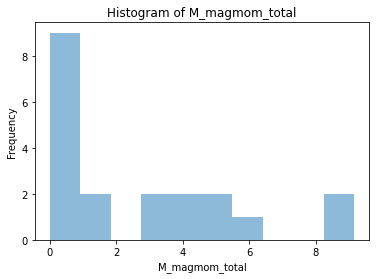

In [53]:
plt.hist(df_total['M_magmom_total'],alpha=0.5)
plt.title('Histogram of M_magmom_total')
plt.xlabel('M_magmom_total')
plt.ylabel('Frequency')

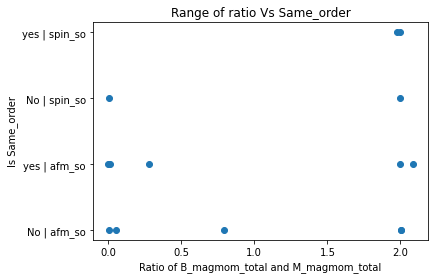

In [56]:
fig, ax2 = plt.subplots()

ax2.scatter(df_total['Ratio'], df_total['Same_order | Bilayer'])

plt.title('Range of ratio Vs Same_order')
plt.xlabel('Ratio of B_magmom_total and M_magmom_total')
plt.ylabel('Is Same_order')

plt.show()

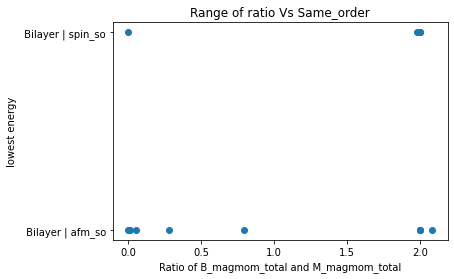

In [57]:
fig, ax2 = plt.subplots()

ax2.scatter(df_total['Ratio'], df_total['lowest energy'])

plt.title('Range of ratio Vs Same_order')
plt.xlabel('Ratio of B_magmom_total and M_magmom_total')
plt.ylabel('lowest energy')

plt.show()

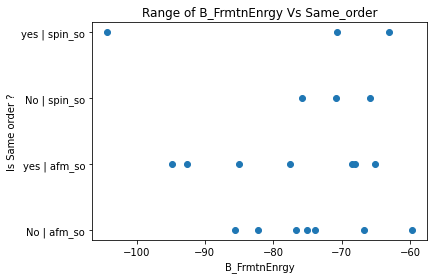

In [73]:
fig, ax2 = plt.subplots()
x = df_total['B_FrmtnEnrgy']
y = df_total['Same_order | Bilayer']
z = df_total['B_Cmpstn']

ax2.scatter(df_total['B_FrmtnEnrgy'], df_total['Same_order | Bilayer'])

plt.title('Range of B_FrmtnEnrgy Vs Same_order')
plt.xlabel('B_FrmtnEnrgy')
plt.ylabel('Is Same order ?')
#    ax2.annotate(z[i],x[i],y[i])
plt.show()

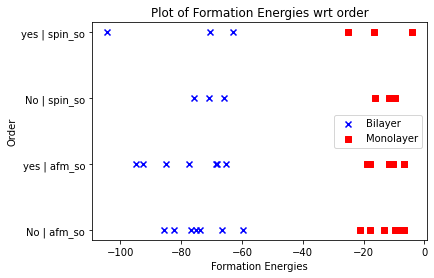

In [60]:
import matplotlib.pyplot as plt

plt.scatter(df_total['B_FrmtnEnrgy'],df_total['Same_order | Bilayer'], c='b', marker='x', label='Bilayer')
plt.scatter(df_total['M_FrmtnEnrgy'], df_total['Same_order | Bilayer'], c='r', marker='s', label='Monolayer')
plt.legend(loc='best')
plt.title('Plot of Formation Energies wrt order')
plt.xlabel('Formation Energies')
plt.ylabel("Order")
plt.show()

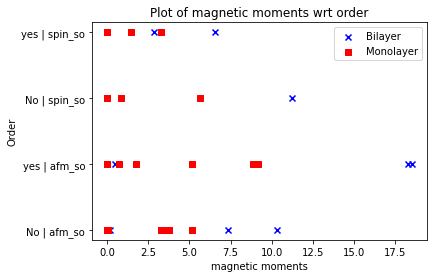

In [61]:
import matplotlib.pyplot as plt

plt.scatter(df_total['B_magmom_total'],df_total['Same_order | Bilayer'], c='b', marker='x', label='Bilayer')
plt.scatter(df_total['M_magmom_total'], df_total['Same_order | Bilayer'], c='r', marker='s', label='Monolayer')
plt.legend(loc='best')
plt.title('Plot of magnetic moments wrt order')
plt.xlabel('magnetic moments')
plt.ylabel("Order")
plt.show()

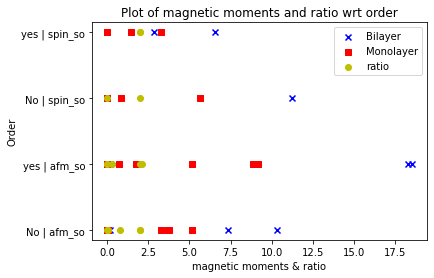

In [65]:
import matplotlib.pyplot as plt

plt.scatter(df_total['B_magmom_total'],df_total['Same_order | Bilayer'], c='b', marker='x', label='Bilayer')
plt.scatter(df_total['M_magmom_total'], df_total['Same_order | Bilayer'], c='r', marker='s', label='Monolayer')
plt.scatter(df_total['Ratio'], df_total['Same_order | Bilayer'], c='y', marker='o', label='ratio')
plt.legend(loc='best')
plt.title('Plot of magnetic moments and ratio wrt order')
plt.xlabel('magnetic moments & ratio')
plt.ylabel("Order")
plt.show()